In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Read in Data

In [137]:
data_dir = r'../data/'

data = pd.DataFrame()

for entry in os.scandir(data_dir):
    if (entry.path.endswith('.json') and entry.is_file()):
        if data.empty:
            data = pd.read_json(entry.path)
        else:
            entry_data = pd.read_json(entry.path)
            data = pd.concat([data, entry_data], ignore_index=True)

# Data Clean-up

In [138]:
# Remove duplicates
data.drop_duplicates(subset ="post_id", 
                     keep = "last", inplace = True)

# Things deemed not important:
# fuel, VIN, drive, size, type
data.drop(['cylinders', 'VIN', 'drive', 'size', 'type'], axis=1, inplace=True)

data.shape

(2598, 12)

### Why did I drop ['cylinders', 'VIN', 'drive', 'size', 'type']?

In [139]:
# Things deemed not important:
# cylinders, fuel, VIN, drive, size, type
# These categories generally stay the same within the same model.
# Rarely will you see different values within the same model, but when you do,
# there is but a small change in price. We want to focus on the most important
# factors, rather than the miniscule.
# VIN is unique to every vehicle.

# To add onto that, see the data below of missing values.
# Above 25% missing: Cylinders, VIN, drive, size, type, paint color
# For cylinders, VIN, drive, size and type, we will remove the columns as a whole. These aren't important
# in the grand scheme of things, because when a vehicle is searched, it's assumed these are constant for that model 
# (except VIN).

# Check NA (percentage missing):
data.isnull().sum() *100 / len(data)

post_id          0.000000
brand            6.081601
url              0.000000
price            0.000000
year             0.000000
model            0.000000
condition       23.633564
fuel             0.000000
odometer        22.093918
title status     0.000000
transmission     0.000000
paint color     33.756736
dtype: float64

In [140]:
# Problems to deal with:

#-----------------------------------------------

# What should we do about the rest of our missing data?
# Well, if we drop all na, then we are left with about only half of the data. 
# That won't be good.
data.dropna().shape

#-----------------------------------------------

# people love to put the odometer, in kms, instead of a full amount. (eg if it's at 150,000 kms, they just put 150)

data[data['odometer'] == 200.0]
# you can see that these vehicles are all older, and are definitely not only 200 kms driven.
# 200,000 sounds about right.
data['odometer'] = np.where((data['odometer'] < 1000.0) & (data['year'] < 2018),
                           data['odometer'] * 1000,
                           data['odometer'])
# If you run a quick "data[data['odometer'] < 1000]", everything looks about right.


# Remove all vehicles with odometer = 0 and year <= 2018.
data.drop(data[data['odometer'] == False][data['year'] <= 2018].index, inplace=True)
# Odometer is a critical part in deciding the price of a vehicle.
# In data size, we aren't missing out on much if we just remove these entries.
# As I am writing this, out of 2598 entries, only 1 satisfies this.

# There's a specific bmw salesman who likes to post ads with an odometer of 1, regardless of actual odometer.
# This really messes with the data.
# Let's remove their entries. They're not that many.
# Ads with a "1" odometer don't really mean it has 1 km on it, either.
data.drop(data[data['odometer'] == 1].index, inplace=True)




data.shape

#-----------------------------------------------

C:\Users\justi\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(2596, 12)

In [145]:
data

,post_id,brand,url,price,year,model,condition,fuel,odometer,title status,transmission,paint color
0,7126452793,nissan,https://vancouver.craigslist.org/van/ctd/d/ric...,25888,2019,rogue,excellent,gas,30128.0,clean,automatic,grey
1,7126422024,mazda,https://vancouver.craigslist.org/nvn/cto/d/nor...,2200,2007,3,good,gas,220337.0,clean,manual,black
2,7126435776,ford,https://vancouver.craigslist.org/nvn/cto/d/nor...,60000,1957,thunderbird,like new,gas,39000.0,clean,automatic,None
3,7126456880,audi,https://vancouver.craigslist.org/van/ctd/d/van...,16980,2012,a3,excellent,diesel,57350.0,clean,automatic,silver
4,7126461218,bmw,https://vancouver.craigslist.org/van/ctd/d/200...,13980,2008,x3,excellent,gas,61500.0,clean,automatic,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,7133087485,nissan,https://vancouver.craigslist.org/van/ctd/d/sur...,14888,2015,rogue,excellent,gas,95260.0,clean,automatic,white
3856,7133082810,chevrolet,https://vancouver.craigslist.org/rds/ctd/d/sur...,26899,2011,silverado duramax hd,None,diesel,233350.0,clean,automatic,None
3857,7133081855,ram,https://vancouver.craigslist.org/rds/ctd/d/lan...,28850,2017,1500,None,gas,64000.0,clean,automatic,None
3858,7133082863,bmw,https://vancouver.craigslist.org/van/ctd/d/bur...,20500,2016,328i xdrive,None,gas,NaN,clean,automatic,None


# Plot and Visualize

Text(0.5, 0, 'count')

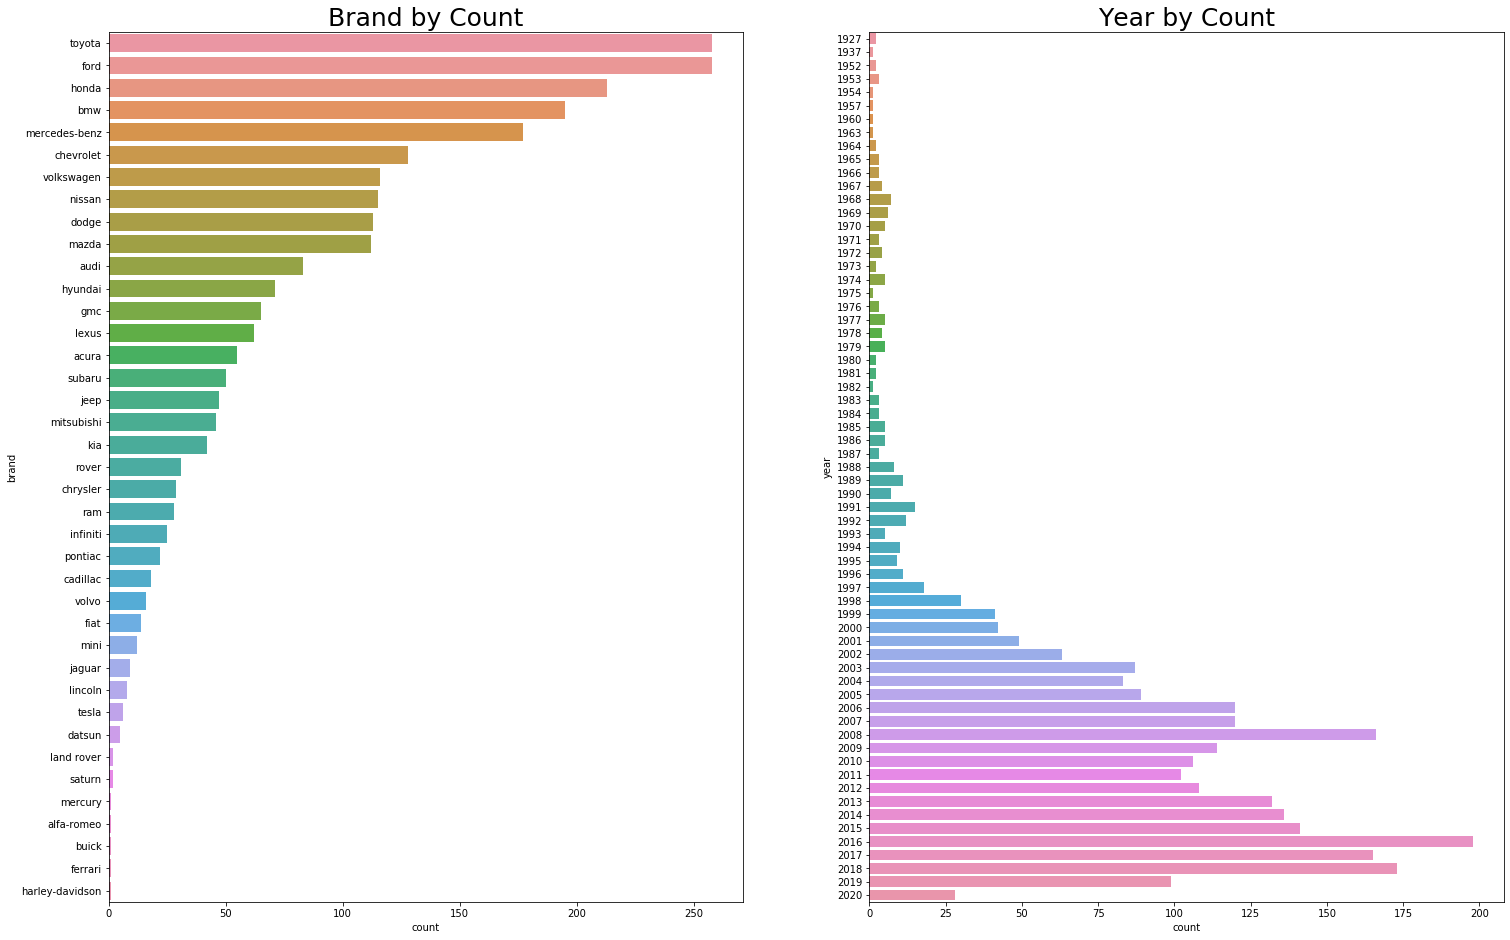

In [141]:
fig, axes = plt.subplots(1,2,figsize=(25,16))

(sns.barplot(y=data.brand.value_counts().index, x=data.brand.value_counts(), orient='h',ax=axes[0])
 .set_title('Brand by Count',fontsize=25))
axes[0].set_ylabel('brand')
axes[0].set_xlabel('count')
(sns.barplot(y=data.year.value_counts().index, x=data.year.value_counts(), orient='h',ax=axes[1])
 .set_title('Year by Count',fontsize=25))
axes[1].set_ylabel('year')
axes[1].set_xlabel('count')